

```
`# This is formatted as code`
```

Calculating the L0 Norm (Manhattan Distance) of a Multi-Dimensional Vector

In [ ]:
import numpy as np

# Example vector (higher-dimensional)
v = np.array([3, -4, 0, -6, 7, 0, -9])

# Compute L0 norm (counts nonzero elements)
l0_norm = np.count_nonzero(v)

# Printing the result
print("Vector:", v)
print(f"L0 Norm of {v} is: {l0_norm}")

Vector: [ 3 -4  0 -6  7  0 -9]
L0 Norm of [ 3 -4  0 -6  7  0 -9] is: 5


##Case Study - 1: Anomaly Detection in Network Traffic Using L0 Norm

Problem Statement:
In network security, detecting anomalies (e.g., cyberattacks, unusual traffic patterns) is critical. Network traffic data is often high-dimensional, with many features (e.g., packet size, protocol type, source/destination IP). However, most of these features are irrelevant for detecting anomalies. The goal is to identify the most significant features that indicate anomalies while ignoring irrelevant ones.


How L0 Norm Helps in This Scenario:
Sparse Feature Selection: The L0 norm counts the number of nonzero elements, helping us identify the most relevant features for anomaly detection.

Efficient Detection: By focusing only on the most significant features, we reduce computational complexity and improve detection speed.

Interpretability: Sparse models are easier to interpret, as they highlight only the key features contributing to anomalies.

Original features: 20
Selected features: 10


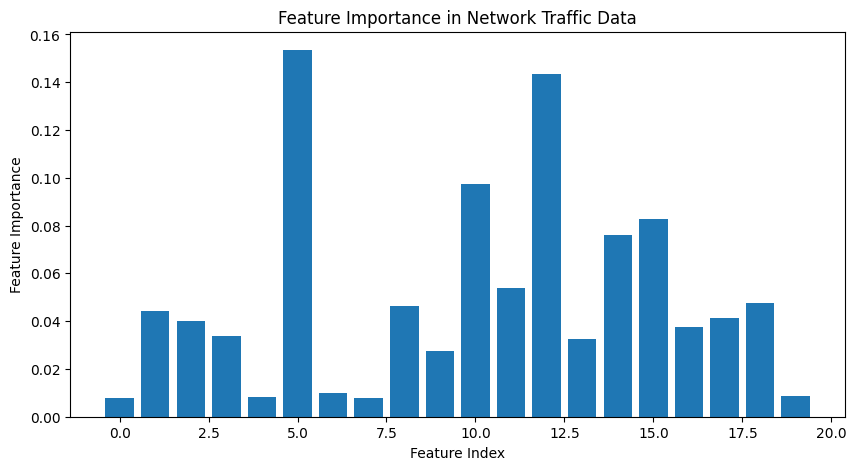

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=10, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train RandomForest and select features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(rf, threshold="median")
X_selected = selector.fit_transform(X_scaled, y)

print(f"Original features: {X.shape[1]}")
print(f"Selected features: {X_selected.shape[1]}")

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), selector.estimator_.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Network Traffic Data")
plt.show()

##For Reference

Original Features: 50
Selected Features: 25
Accuracy: 0.935
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       208
           1       0.93      0.93      0.93       192

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.94      0.94      0.94       400



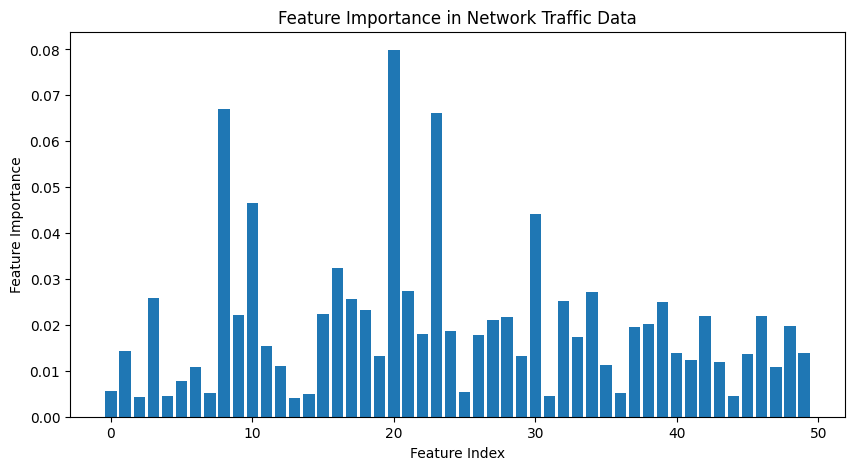

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

# Step 1: Generate Synthetic Network Traffic Data
X, y = make_classification(n_samples=2000, n_features=50, n_informative=10,
                           n_redundant=30, random_state=42)

# Step 2: Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Train Random Forest Model for Feature Selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(rf, threshold="median")  # Select features with importance > median
X_selected = selector.fit_transform(X_scaled, y)

# Step 4: Print Feature Selection Results
print(f"Original Features: {X.shape[1]}")
print(f"Selected Features: {X_selected.shape[1]}")

# Step 5: Train a Classifier on Selected Features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step 6: Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize Feature Importance
plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), selector.estimator_.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance in Network Traffic Data")
plt.show()